# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [2]:
df.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


### Вывод

1. В таблице много пропущеных данных
2. total_images - вроде все в порядке. 20 фото, на мой взгляд многовати, но это лучше чем ничего.
3. last_price - крайнее значение в 763000000 кажется очень большим, но с квартирами нет ничего не возможного).
4. total_area - 900 кв.м. - больше похоже на складское помещение или в крайнем случае дом (домище). Но не на квартиру. Нужно проверить.
5. first_day_exposition - указаны только даты. Без времени. Думаю можно будет округлить до дат и избавиться от нулей во времени.
6. rooms - 19 комнат! Это наверное квартира в 900 кв.м.)
7. ceiling_height:
 - есть пропуски, чуть больше 30%
 - 100 метов для потолков в квартире многовато
 - Потолок в 1 метр? Кто живет там?
8. floors_total:
 - есть пропуски
 - тип данных float, нужно изменить
9. living_area:
 - есть пропуски
 - 409,7 кв.м. многовато, а 2 кв.м. очень мало.
10. floor - замечаний нет.
11. is_apartment - очень много пропусков
12. studio - замечаний нет.
13. open_plan - замечаний нет.
14. kitchen_area:
 - есть пропуски
 - 112 кв.м. многовато, а 1,3 кв.м. очень мало.
15. balcony:
 - есть пропуски
 - 5 балконов?!
16. locality_name - есть пропуски
17. airports_nearest:
 - есть пропуски
 - есть нулевые значения
18. cityCenters_nearest - есть пропуски
19. parks_around3000 - есть пропуски
20. parks_nearest - есть пропуски
21. ponds_around3000 - есть пропуски
22. ponds_nearest - есть пропуски
23. days_exposition - есть пропуски

### Шаг 2. Предобработка данных

***Посмотрим пропуски в locality_name***

In [5]:
df[df['locality_name'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.70,2016-04-15T00:00:00,3,3.55,5.0,50.80,2,NaN,...,8.80,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.00,2017-05-30T00:00:00,3,NaN,4.0,42.60,2,NaN,...,18.60,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.70,2015-09-20T00:00:00,1,NaN,24.0,15.60,3,NaN,...,10.70,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.40,2015-10-11T00:00:00,2,NaN,24.0,33.10,21,NaN,...,8.20,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.50,2016-05-28T00:00:00,2,NaN,5.0,30.80,5,NaN,...,6.50,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000.0,89.50,2014-12-09T00:00:00,2,3.00,8.0,39.62,7,NaN,...,13.38,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000.0,80.00,2015-12-10T00:00:00,3,4.00,4.0,52.30,3,False,...,10.40,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000.0,83.00,2015-08-14T00:00:00,3,NaN,7.0,NaN,6,NaN,...,NaN,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000.0,85.50,2016-01-20T00:00:00,3,NaN,7.0,59.10,5,False,...,8.30,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7,3700000.0,30.00,2016-04-29T00:00:00,1,NaN,24.0,20.00,23,NaN,...,NaN,0.0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


Уберем пропуски в locality_name. 

 От центра до КАД 12км (самое кротчайшее расстояние). Заменим пропуски на Санкт-Петербург при услови что расстояние до центра меньше 12км. Остальные заменим на "Другое"

In [6]:
df.loc[(df['cityCenters_nearest'] < 12000), 'locality_name'] = (df.loc[(df['cityCenters_nearest'] < 12000), 'locality_name']
                                                                .fillna('Санкт-Петербург')
                                                               )

df['locality_name'] = df['locality_name'].fillna('Другое')
df[df['locality_name'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


***Редактирование столбца first_day_exposition***

In [7]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')
#Округляем дату до дня публикации
#df['first_day_exposition'] = df['first_day_exposition'].dt.round('D')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


***Посмотрим значения столбца rooms***

In [8]:
df['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

Посмотрим кол-во строк по значениям rooms

In [9]:
df.pivot_table(index=['rooms'], values='studio', aggfunc='count').sort_values('rooms')

,studio
rooms,
0,197
1,8047
2,7940
3,5814
4,1180
5,326
6,105
7,59
8,12


Будем считать что там где rooms = 0 - это студия. Соответственно если rooms > 0 , то studio должно быть - False. Проверим так ли это. 

In [10]:
df.pivot_table(index=['studio'], values='rooms', aggfunc='count').sort_values('studio')

,rooms
studio,
False,23550
True,149


149 студий. В это значение могут входить квартиры с rooms = 1.

Посмотрим на строки с rooms = 0 и studio = False и c rooms <= 1 и studio = True

In [11]:
df.loc[(df['rooms'] == 0) & (df['studio'] == False)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
349,4,2320000.0,25.00,2017-09-27,0,NaN,14.0,17.0,1,NaN,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
508,0,3375000.0,34.40,2017-03-28,0,NaN,26.0,24.3,19,NaN,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
780,9,2600000.0,26.10,2018-02-20,0,NaN,18.0,NaN,8,NaN,...,NaN,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
839,14,1900000.0,35.00,2017-04-14,0,2.70,5.0,15.0,3,False,...,NaN,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
946,5,2200000.0,23.00,2016-09-27,0,NaN,27.0,18.0,7,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0
1574,0,2200000.0,22.00,2017-11-03,0,NaN,18.0,15.0,16,NaN,...,NaN,1.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,81.0
1625,7,1980000.0,23.98,2018-02-01,0,NaN,4.0,10.5,3,NaN,...,NaN,1.0,поселок станции Корнево,NaN,NaN,NaN,NaN,NaN,NaN,120.0
2532,5,3500000.0,27.10,2018-02-01,0,NaN,18.0,18.7,9,NaN,...,NaN,2.0,Санкт-Петербург,32036.0,8175.0,0.0,NaN,1.0,644.0,70.0
3019,18,2100000.0,24.00,2017-11-10,0,NaN,10.0,18.0,6,NaN,...,NaN,2.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4115,7,2600000.0,24.00,2018-02-01,0,NaN,25.0,18.0,4,NaN,...,NaN,2.0,Санкт-Петербург,10031.0,13330.0,1.0,915.0,0.0,NaN,42.0


In [12]:
df.loc[(df['rooms'] <=1) & (df['studio'] == True)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,NaN,24.0,15.50,2,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
440,8,2480000.0,27.11,2018-03-12,0,NaN,17.0,24.75,4,NaN,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
608,2,1850000.0,25.00,2019-02-20,0,NaN,10.0,NaN,7,NaN,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
697,12,2500000.0,24.10,2017-12-01,0,2.75,25.0,17.50,21,NaN,...,NaN,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
716,5,1500000.0,17.00,2017-06-07,0,2.70,9.0,12.00,1,NaN,...,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22867,8,3090000.0,30.00,2017-12-17,0,NaN,25.0,18.20,5,NaN,...,NaN,NaN,Санкт-Петербург,35250.0,16414.0,0.0,NaN,1.0,400.0,211.0
22877,2,4280000.0,28.00,2017-10-26,0,2.70,19.0,18.00,10,NaN,...,NaN,NaN,Санкт-Петербург,18982.0,7206.0,0.0,NaN,1.0,415.0,151.0
23210,7,3200000.0,26.00,2017-09-01,0,NaN,25.0,18.00,16,NaN,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23554,15,3350000.0,26.00,2018-09-07,0,NaN,19.0,NaN,8,NaN,...,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0


In [13]:
df.loc[(df['rooms'] > 1) & (df['studio'] == True)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Скорее всего пользователь заполняли обьявления каждый по своему и из-за этого получились расхождения.

Исправим это:
* Там где rooms = 0, поставим значение studio = True
* Там где rooms > 1, поставим значение studio = False

In [14]:
def studio(row):
    if row['rooms'] == 0 and row['studio'] == False: 
        return True
    elif row['rooms'] == 1 and row['studio'] == True:
        return False
    return row['studio']
df['studio'] = df.apply(studio, axis=1)

Проверим

In [15]:
df.loc[(df['rooms'] == 0) & (df['studio'] == False)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [16]:
df.loc[(df['rooms'] <=1) & (df['studio'] == True)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,NaN,24.0,15.50,2,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27,0,NaN,14.0,17.00,1,NaN,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12,0,NaN,17.0,24.75,4,NaN,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28,0,NaN,26.0,24.30,19,NaN,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20,0,NaN,10.0,NaN,7,NaN,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01,0,NaN,25.0,18.00,16,NaN,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28,0,NaN,24.0,18.00,4,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07,0,NaN,19.0,NaN,8,NaN,...,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11,0,NaN,9.0,18.00,8,NaN,...,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


***Посмотрим значения ceiling_height***

Уникальные значения

In [17]:
df['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Значения больше 25 кв.м.

In [18]:
df.loc[(df['ceiling_height'] > 25), 'ceiling_height']

3148      32.0
4876      27.0
5246      27.0
5669      26.0
5807      27.0
10773     27.0
17857     27.0
20478     27.0
21377     27.5
21824     27.0
22336     32.0
22869    100.0
22938     27.0
Name: ceiling_height, dtype: float64

В даных есть значения 26, 27... метров. Возможно ползователи ошиблись и не поставили запятую.
Заеним пропуски в ceiling_height почти мидеанным значением. Мидеанное значение высоты потолков - 2,65, возмем 2,7 - самая распространенная высота.
А данные в прмежутке с 25 до 100 разделим на 10.

In [19]:
df.loc[(df['ceiling_height'] > 25) & (df['ceiling_height'] < 100), 'ceiling_height'] = df['ceiling_height'] / 10
df.loc[(df['ceiling_height'] > 25), 'ceiling_height']

22869    100.0
Name: ceiling_height, dtype: float64

In [20]:
df['ceiling_height'] = df['ceiling_height'].fillna(2.7)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.70,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.70,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.70,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


***floors_total***

Заменим пропуски в floors_total медианным значением в зависимости от населенного пункта

In [21]:
median_incomes = df.groupby('locality_name')['floors_total'].median().to_dict()

def floor(row):
    if pd.isna(row['floors_total']):
        return median_incomes[row['locality_name']]
    return row['floors_total']

df['floors_total'] = df.apply(floor, axis=1)

In [22]:
df.query('floors_total.isna()', engine='python')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


***Рассмотрим balcony***

Этот столбец, скорее всего игнорировали те, у кого нет балконов. Заменим все пропущеные значения на 0

In [23]:
df.query('balcony.isna()', engine='python')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.70,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23,1,2.70,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
10,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.30,3,NaN,...,8.50,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000.0,30.00,2017-07-07,1,2.70,5.0,17.50,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.30,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,2.70,5.0,38.00,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,2.70,3.0,29.70,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df['balcony'] = df['balcony'].fillna(0)
df.query('balcony.isna()', engine='python')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


***Пропуски в living_area***

In [25]:
df.query('living_area.isna()', engine='python')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.00,2015-07-24,3,2.70,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.60,2019-04-18,2,2.70,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.80,2018-02-19,1,2.70,9.0,NaN,2,NaN,...,NaN,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28,2,2.50,5.0,NaN,1,NaN,...,NaN,0.0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.00,2018-11-18,1,2.70,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000.0,80.30,2018-07-03,3,2.70,12.0,NaN,5,NaN,...,NaN,0.0,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000.0,88.00,2018-01-12,4,2.55,10.0,NaN,1,NaN,...,NaN,0.0,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.60,2018-02-08,1,2.80,9.0,NaN,2,NaN,...,NaN,0.0,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.00,2017-12-08,1,2.70,9.0,NaN,4,NaN,...,NaN,0.0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Заменим пропуски в living_area, разницей между total_area и kitchen_area, в тех строках где есть эти значения и нет балкона

In [26]:
def area(row):
    if pd.isna(row['living_area']) & (row['kitchen_area'] > 0) & (row['balcony'] == 0):
        return row['total_area'] - row['kitchen_area']
    return row['living_area']
 
df['living_area'] = df.apply(area, axis=1)

In [27]:
df.query('living_area.isna()', engine='python')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.00,2015-07-24,3,2.70,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.60,2019-04-18,2,2.70,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.80,2018-02-19,1,2.70,9.0,NaN,2,NaN,...,NaN,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28,2,2.50,5.0,NaN,1,NaN,...,NaN,0.0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.00,2018-11-18,1,2.70,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000.0,80.30,2018-07-03,3,2.70,12.0,NaN,5,NaN,...,NaN,0.0,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000.0,88.00,2018-01-12,4,2.55,10.0,NaN,1,NaN,...,NaN,0.0,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.60,2018-02-08,1,2.80,9.0,NaN,2,NaN,...,NaN,0.0,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.00,2017-12-08,1,2.70,9.0,NaN,4,NaN,...,NaN,0.0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Что делать с остальными пропусками я не знаю. По этому заменим их на 0

In [28]:
df['living_area'] = df['living_area'].fillna(0)
df.query('living_area.isna()', engine='python')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


***Рассмотрим is_apartment***

Этот столбец, скорее всего, пользаватели игнорировали. Поскольку у болшенства квартиры, а не апартаменты.
Заменим все пропущеные значения на 0

In [29]:
df.query('is_apartment.isna()', engine='python')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.70,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.70,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.70,14.0,0.0,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,...,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,2.70,5.0,38.0,4,NaN,...,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,2.70,3.0,29.7,1,NaN,...,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,0.0,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [30]:
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [31]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df.query('is_apartment.isna()', engine='python')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


***Рассмотрим kitchen_area***

Заменим пропуски разницей между общей площадью и жилой, при условии что нет балеона.
Сначала посмотрим сколько строк с балконми и с пропусками по kitchen_area

In [32]:
df.query('kitchen_area.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24,3,2.70,14.0,0.0,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19,1,2.70,9.0,0.0,2,False,...,NaN,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28,2,2.50,5.0,0.0,1,False,...,NaN,0.0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18,1,2.70,22.0,0.0,3,False,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06,1,2.70,13.0,0.0,13,False,...,NaN,0.0,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,1,2414306.0,40.5,2016-09-08,1,2.56,18.0,19.6,10,False,...,NaN,0.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,627.0
23663,12,6400000.0,88.0,2018-01-12,4,2.55,10.0,0.0,1,False,...,NaN,0.0,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.6,2018-02-08,1,2.80,9.0,0.0,2,False,...,NaN,0.0,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.0,2017-12-08,1,2.70,9.0,0.0,4,False,...,NaN,0.0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [33]:
df.query('(balcony == 0) and (living_area > 0) and kitchen_area.isna()').sort_values('total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19904,4,2400000.0,12.0,2017-07-19,1,2.55,5.0,10.0,2,False,...,NaN,0.0,Санкт-Петербург,21314.0,964.0,1.0,886.0,2.0,45.0,200.0
19807,0,3800000.0,13.0,2018-07-04,1,2.70,5.0,10.0,3,False,...,NaN,0.0,Санкт-Петербург,21302.0,1242.0,1.0,592.0,3.0,27.0,9.0
8886,10,2450000.0,15.5,2018-08-22,0,2.70,5.0,10.0,2,False,...,NaN,0.0,Санкт-Петербург,24326.0,4589.0,0.0,NaN,1.0,446.0,27.0
9412,5,2100000.0,16.0,2017-12-10,0,2.70,6.0,13.0,1,False,...,NaN,0.0,Санкт-Петербург,20735.0,2111.0,2.0,228.0,3.0,72.0,3.0
716,5,1500000.0,17.0,2017-06-07,0,2.70,9.0,12.0,1,False,...,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22907,9,65000000.0,228.0,2016-06-02,4,2.70,5.0,200.0,2,False,...,NaN,0.0,Санкт-Петербург,22783.0,1295.0,3.0,619.0,3.0,269.0,NaN
7857,11,150000000.0,230.0,2017-10-25,8,2.70,8.0,220.0,8,False,...,NaN,0.0,Санкт-Петербург,25525.0,5845.0,2.0,116.0,0.0,NaN,135.0
20788,7,18000000.0,245.0,2017-04-06,8,3.54,5.0,155.0,2,False,...,NaN,0.0,Санкт-Петербург,22215.0,2424.0,1.0,867.0,1.0,340.0,357.0
5631,14,99000000.0,280.0,2018-01-19,3,2.70,4.0,160.0,4,False,...,NaN,0.0,Санкт-Петербург,21178.0,1281.0,2.0,283.0,3.0,22.0,NaN


заменим пропуски разницей между общей площадью и жилой, при условии что нет балкона.

In [34]:
def kitchen(row):
    if pd.isna(row['kitchen_area']) and row['living_area'] > 0 and row['balcony'] == 0:
        return row['total_area'] - row['living_area']
    return row['kitchen_area']
 
df['kitchen_area'] = df.apply(kitchen, axis=1)

df.query('kitchen_area.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24,3,2.70,14.0,0.0,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19,1,2.70,9.0,0.0,2,False,...,NaN,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28,2,2.50,5.0,0.0,1,False,...,NaN,0.0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18,1,2.70,22.0,0.0,3,False,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06,1,2.70,13.0,0.0,13,False,...,NaN,0.0,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23637,8,2350000.0,26.0,2018-06-26,0,2.70,25.0,17.0,4,False,...,NaN,2.0,посёлок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,207.0
23642,14,5950000.0,80.3,2018-07-03,3,2.70,12.0,0.0,5,False,...,NaN,0.0,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000.0,88.0,2018-01-12,4,2.55,10.0,0.0,1,False,...,NaN,0.0,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.6,2018-02-08,1,2.80,9.0,0.0,2,False,...,NaN,0.0,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0


С остальными значениями kitchen_area я не знаю что делать. По этому заменим их на 0

In [35]:
df['kitchen_area'] = df['kitchen_area'].fillna(0)
df.query('kitchen_area.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


***airports_nearest***

Заменим пропуски airports_nearest медтианными значениями в соответсвии с городом

In [36]:
median = df.groupby('locality_name')['airports_nearest'].median().to_dict()

def air(row):
    if pd.isna(row['airports_nearest']):
        return median.get(row['locality_name'])
    return row['airports_nearest']
df['airports_nearest'] = df.apply(air, axis=1)
df.query('airports_nearest.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10,1,2.70,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23,1,2.70,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30,2,2.70,5.0,30.00,5,False,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24,2,2.75,25.0,30.00,15,False,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19,1,2.70,9.0,0.00,2,False,...,0.00,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18,4,2.50,5.0,45.50,3,False,...,5.50,0.0,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07,1,2.70,5.0,17.50,4,False,...,6.00,0.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15,3,2.70,5.0,38.00,4,False,...,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,2.70,3.0,29.70,1,False,...,27.00,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Остальные значения airports_nearest оставим с пропусками.

Так-как эти значения заполняются автоматически, мог произойти сбой.

***cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest***

С cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest поступим так жек как и с airports_nearest

In [37]:
median_city = df.groupby('locality_name')['cityCenters_nearest'].median().to_dict()
median_parks_around = df.groupby('locality_name')['parks_around3000'].median().to_dict()
median_parks_nearest = df.groupby('locality_name')['parks_nearest'].median().to_dict()
median_ponds_around = df.groupby('locality_name')['ponds_around3000'].median().to_dict()
median_ponds_nearest = df.groupby('locality_name')['ponds_nearest'].median().to_dict()

In [38]:
def city(row):
    if pd.isna(row['cityCenters_nearest']):
        return median_city.get(row['locality_name'])
    return row['cityCenters_nearest']
df['cityCenters_nearest'] = df.apply(city, axis=1)

def parks_around3000(row):
    if pd.isna(row['parks_around3000']):
        return median_parks_around.get(row['locality_name'])
    return row['cityCenters_nearest']
df['parks_around3000'] = df.apply(parks_around3000, axis=1)

def parks_nearest(row):
    if pd.isna(row['parks_nearest']):
        return median_parks_nearest.get(row['locality_name'])
    return row['parks_nearest']
df['parks_nearest'] = df.apply(parks_nearest, axis=1)

def ponds_around3000(row):
    if pd.isna(row['ponds_around3000']):
        return median_ponds_around.get(row['locality_name'])
    return row['ponds_around3000']
df['ponds_around3000'] = df.apply(ponds_around3000, axis=1)

def ponds_nearest(row):
    if pd.isna(row['ponds_nearest']):
        return median_ponds_nearest.get(row['locality_name'])
    return row['ponds_nearest']
df['ponds_nearest'] = df.apply(ponds_nearest, axis=1) 

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        18313 non-null float64
cityCenters_nearest     18313 non-null float64
parks_around3000        18313 non-null float64
parks_nearest           17678 non-null float64
ponds_a

***days_exposition***

In [40]:
df.query('days_exposition.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,16028.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.60,2019-04-18,2,2.70,24.0,0.0,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,11634.0,460.0,0.0,503.0,NaN
44,13,5350000.0,40.00,2018-11-18,1,2.70,22.0,0.0,3,False,...,0.00,1.0,Санкт-Петербург,30471.0,11603.0,11603.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.60,2018-12-02,2,2.65,9.0,30.3,7,False,...,7.00,0.0,Санкт-Петербург,30011.0,12872.0,12872.0,460.0,0.0,503.0,NaN
46,17,6600000.0,52.10,2019-01-31,2,2.60,24.0,29.7,9,False,...,8.30,2.0,Санкт-Петербург,15114.0,12702.0,12702.0,460.0,0.0,503.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.00,2018-11-02,4,3.00,26.0,71.4,17,False,...,15.60,0.0,Санкт-Петербург,11827.0,11459.0,11459.0,460.0,0.0,503.0,NaN
23685,15,2490000.0,31.00,2019-01-24,1,2.50,5.0,17.3,5,False,...,5.60,1.0,Ломоносов,48393.0,51818.0,51818.0,407.0,0.0,553.0,NaN
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,13.83,0.0,Санкт-Петербург,24665.0,4232.0,4232.0,796.0,3.0,381.0,NaN
23696,18,2500000.0,56.70,2018-02-11,2,2.70,3.0,29.7,1,False,...,27.00,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Заменим пропуски в days_exposition на 0. 

Пропуски в этом столбце могли образоваться из-за ошибке при выгрузке или из-за того что объявление небыло снято с публикации на момент выгрузки.

In [41]:
df['days_exposition'] = df['days_exposition'].fillna(0)

***Замена типов данных***

Еще раз посмотрим на таблицу и типы данных

In [42]:
df.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

floors_total - должно быть целое число. Заменим float на int

In [43]:
df['floors_total'] = df['floors_total'].astype(int)

is_apartment - должен быть булев. Заменим object на bool

In [44]:
df['is_apartment'] = df['is_apartment'].astype(bool)

balcony - должно быть целое число. Заменим float на int

In [45]:
df['balcony'] = df['balcony'].astype(int)

days_exposition - должно быть целое число. Заменим float на int

In [46]:
df['days_exposition'] = df['days_exposition'].astype(int)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        18313 non-null float64
cityCenters_nearest     18313 non-null float64
parks_around3000        18313 non-null float64
parks_nearest           17678 non-null float64
ponds_aroun

***Проверка на дубликаты***

In [48]:
df.duplicated(keep = False).sum()

0

### Шаг 3. Посчитайте и добавьте в таблицу

Создаем столбец "Цена квадратного метра" - price_area

In [49]:
df['price_area'] = df['last_price'] / df['total_area']
df['price_area'] = df['price_area'].round(2)
df.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,16028.0,482.0,2.0,755.0,0,120370.37
1,7,3350000.0,40.4,2018-12-04,1,2.70,11,18.6,1,False,...,2,посёлок Шушары,12817.0,18603.0,18603.0,NaN,0.0,584.5,81,82920.79
2,10,5196000.0,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,13933.0,90.0,2.0,574.0,558,92785.71
3,0,64900000.0,159.0,2015-07-24,3,2.70,14,0.0,9,False,...,0,Санкт-Петербург,28098.0,6800.0,6800.0,84.0,3.0,234.0,424,408176.10
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,8098.0,112.0,1.0,48.0,121,100000.00


Создаем столбцы "день недели", "месяц" и "год" публикации объявления - day, month, year

In [50]:
#df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])
df['day'] = df['first_day_exposition'].dt.weekday + 1
df['year'] = df['first_day_exposition'].dt.year
df['month'] = df['first_day_exposition'].dt.month
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_area,day,year,month
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,16028.0,482.0,2.0,755.0,0,120370.37,4,2019,3
1,7,3350000.0,40.4,2018-12-04,1,2.70,11,18.6,1,False,...,18603.0,18603.0,NaN,0.0,584.5,81,82920.79,2,2018,12
2,10,5196000.0,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,13933.0,13933.0,90.0,2.0,574.0,558,92785.71,4,2015,8
3,0,64900000.0,159.0,2015-07-24,3,2.70,14,0.0,9,False,...,6800.0,6800.0,84.0,3.0,234.0,424,408176.10,5,2015,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,8098.0,112.0,1.0,48.0,121,100000.00,2,2018,6


К df['day'] прибавил 1, что бы было более понятно:
* 1 - понедельник
* 2 - вторник
* 3 - среда
* 4 - четверг
* 5 - пятница
* 6 - суббота
* 7 - воскресенье


Создаем столбец "этаж квартиры" варианты — первый, последний, другой

In [51]:
def floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'
df['floor_apart'] = df.apply(floor, axis=1)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_area,day,year,month,floor_apart
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,482.0,2.0,755.0,0,120370.37,4,2019,3,другой
1,7,3350000.0,40.4,2018-12-04,1,2.70,11,18.6,1,False,...,18603.0,NaN,0.0,584.5,81,82920.79,2,2018,12,первый
2,10,5196000.0,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,13933.0,90.0,2.0,574.0,558,92785.71,4,2015,8,другой
3,0,64900000.0,159.0,2015-07-24,3,2.70,14,0.0,9,False,...,6800.0,84.0,3.0,234.0,424,408176.10,5,2015,7,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,112.0,1.0,48.0,121,100000.00,2,2018,6,другой


Создаем стобец соотношения жилой площади к общей  ratio_residential_to_total

In [52]:
df['ratio_residential_to_total'] = df['living_area'] / df['total_area']
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_area,day,year,month,floor_apart,ratio_residential_to_total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,0,120370.37,4,2019,3,другой,0.472222
1,7,3350000.0,40.4,2018-12-04,1,2.70,11,18.6,1,False,...,NaN,0.0,584.5,81,82920.79,2,2018,12,первый,0.460396
2,10,5196000.0,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,90.0,2.0,574.0,558,92785.71,4,2015,8,другой,0.612500
3,0,64900000.0,159.0,2015-07-24,3,2.70,14,0.0,9,False,...,84.0,3.0,234.0,424,408176.10,5,2015,7,другой,0.000000
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121,100000.00,2,2018,6,другой,0.320000


Создаем стобец соотношения площади кухни к общей ratio_kitchen_to_total

In [53]:
df['ratio_kitchen_to_total'] = df['kitchen_area'] / df['total_area']
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_area,day,year,month,floor_apart,ratio_residential_to_total,ratio_kitchen_to_total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2.0,755.0,0,120370.37,4,2019,3,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.70,11,18.6,1,False,...,0.0,584.5,81,82920.79,2,2018,12,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,2.0,574.0,558,92785.71,4,2015,8,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.70,14,0.0,9,False,...,3.0,234.0,424,408176.10,5,2015,7,другой,0.000000,0.000000
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121,100000.00,2,2018,6,другой,0.320000,0.410000


<div class="alert alert-block alert-success">
<b>Success:</b> Все столбцы на месте!</div>

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

***Изучение параметров:*** 
* площадь
* цена
* число комнат
* высота потолков

In [54]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23699.000000,2.369900e+04,23699.000000,23699.000000
mean,60.348651,6.541549e+06,2.070636,2.731093
std,35.654083,1.088701e+07,1.078405,0.809172
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.600000
50%,52.000000,4.650000e+06,2.000000,2.700000
75%,69.900000,6.800000e+06,3.000000,2.700000
max,900.000000,7.630000e+08,19.000000,100.000000


***Предварительный анализ дал следующее:***

* по площади есть как квартира 12 кв.м., так и 900 кв.м. Но среднее значение выглядит адэкватным
* по цене за квартиру - есть варианты и за 12 тысяч рублей, есть за 763 млн
* число комнат - от 0 (студия) до 19. Возможно нежилые помещения
* высота потолков - от 1 до 100 метров. 1 м. выглядит странно

***Создадим гистограммы для каждого параметра***

Площади

In [55]:
df[['total_area', 'living_area', 'kitchen_area']].describe().T

,count,mean,std,min,25%,50%,75%,max
total_area,23699.0,60.348651,35.654083,12.0,40.0,52.0,69.900,900.0
living_area,23699.0,32.292515,23.840775,0.0,18.0,29.4,41.700,571.0
kitchen_area,23699.0,10.012460,6.792525,0.0,6.6,9.0,11.845,129.3


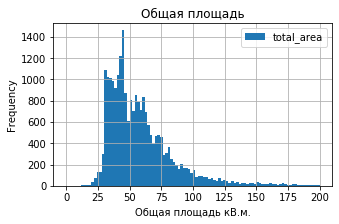

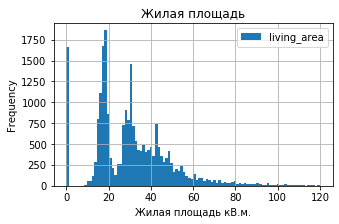

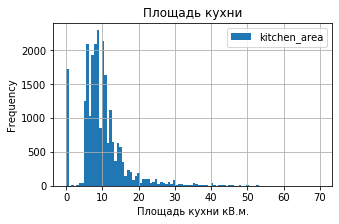

In [56]:
columns = ['total_area', 'living_area', 'kitchen_area']
ranges = [(0,200), (0,120), (0,70)]
names = ['Общая площадь', 'Жилая площадь', 'Площадь кухни']
names_x = ['Общая площадь кВ.м.', 'Жилая площадь кВ.м.', 'Площадь кухни кВ.м.']

for i in range(len(columns)):
    df.plot(y = columns[i], title = names[i], kind = 'hist', bins = 100, grid = True, figsize = (5,3), range = ranges[i],
            legend=True)
    plt.xlabel(names_x[i])
    df[columns[i]].describe()
    

Вбросы 0-вых значений это пропуски, которые я заменил на 0

Наибольшее кол-во квартир с площадъю от 30 до 60 кв.м.

Диаграммы размаха для площадей

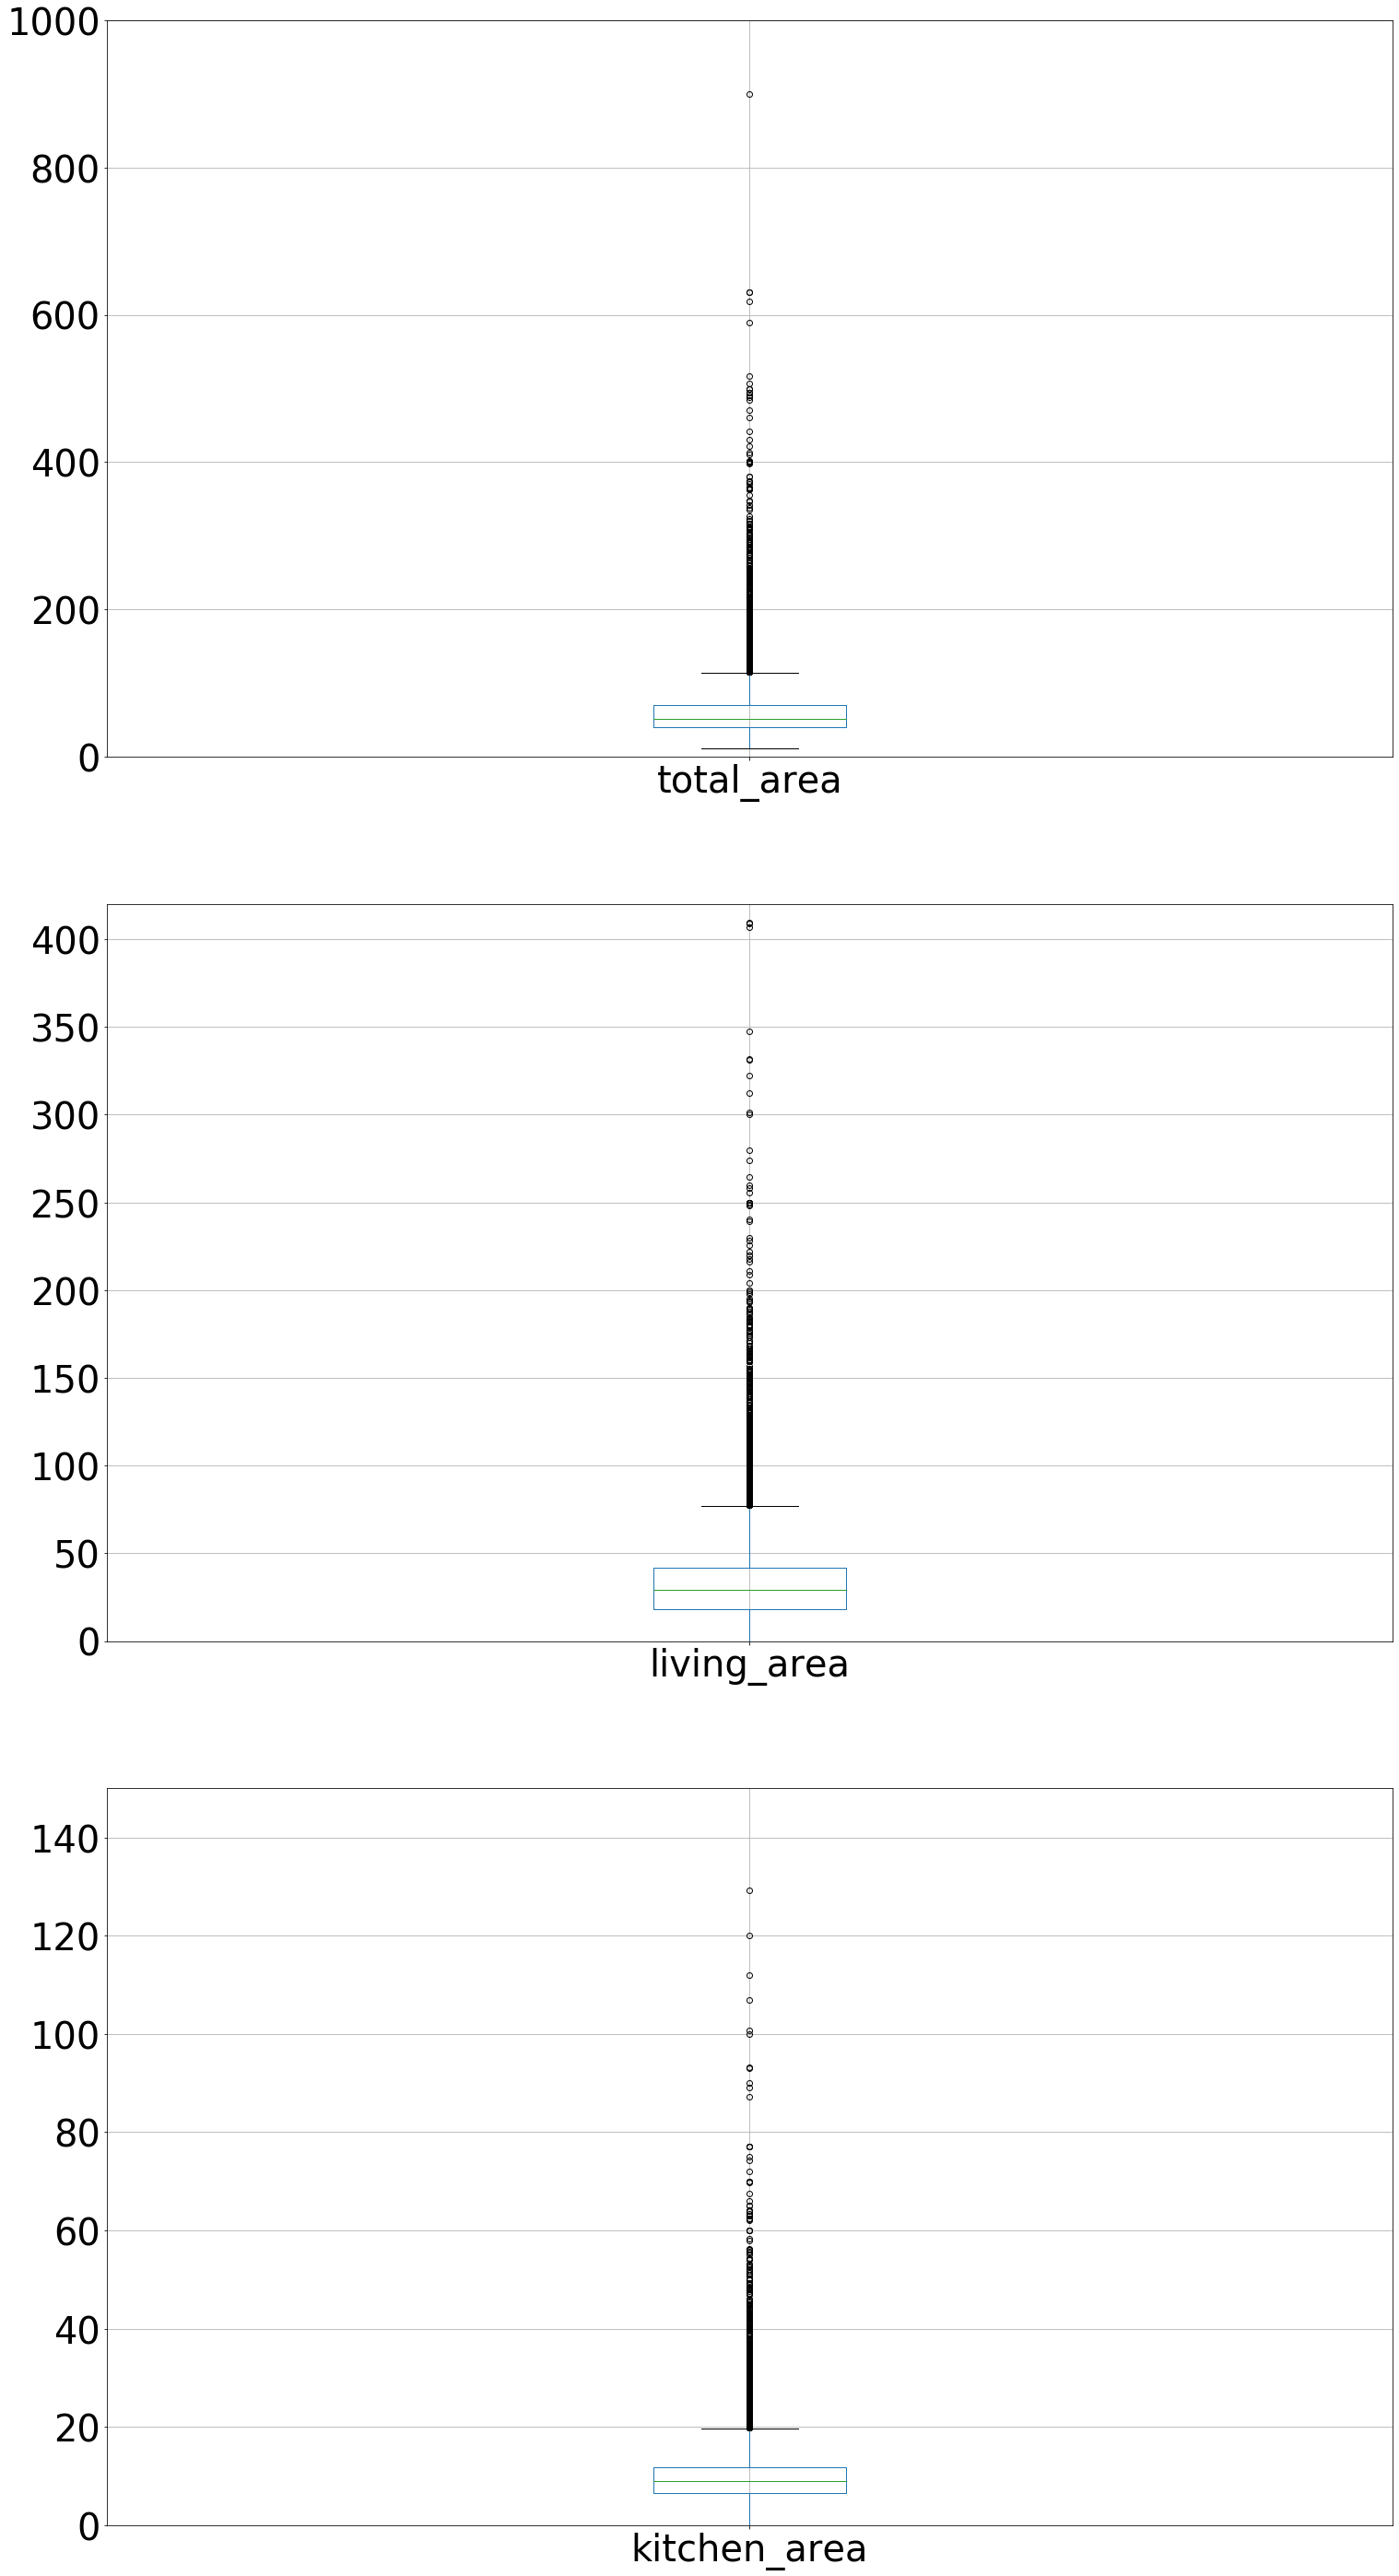

In [57]:
cols = 3
fig, axes = plt.subplots(cols, figsize=(25,50))
column_list = ['total_area', 'living_area', 'kitchen_area']
ylims = [1000, 420, 150]
count = 0

for c in range(cols):
    ax = df.boxplot(column=column_list[count], ax=axes[c], fontsize=40)
    ax.set_ylim([0, ylims[count]])
    count += 1

Из этих данных видно что есть вбросы:
* total_area 550 и выше, до этих значений данные кажутся верными
* living_area после 300, до этих значений данные кажутся верными
* kitchen_area после 100, до этих значений данные кажутся верными

цена, число комнат, высота потолков

In [58]:
df[['last_price', 'rooms', 'ceiling_height']].describe()

,last_price,rooms,ceiling_height
count,2.369900e+04,23699.000000,23699.000000
mean,6.541549e+06,2.070636,2.731093
std,1.088701e+07,1.078405,0.809172
min,1.219000e+04,0.000000,1.000000
25%,3.400000e+06,1.000000,2.600000
50%,4.650000e+06,2.000000,2.700000
75%,6.800000e+06,3.000000,2.700000
max,7.630000e+08,19.000000,100.000000


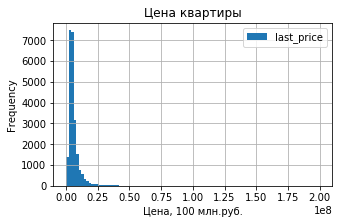

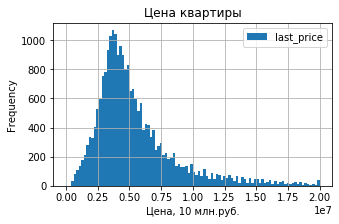

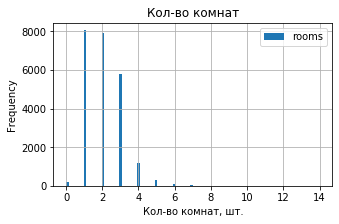

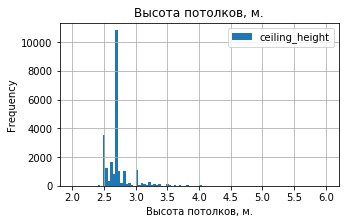

In [59]:
columns = ['last_price', 'last_price', 'rooms', 'ceiling_height']
ranges = [(0,200000000), (0,20000000), (0,14), (2,6)]
names = ['Цена квартиры', 'Цена квартиры', 'Кол-во комнат', 'Высота потолков, м.']
names_x = ['Цена, 100 млн.руб.', 'Цена, 10 млн.руб.', 'Кол-во комнат, шт.', 'Высота потолков, м.']

for i in range(len(columns)):
    df.plot(y = columns[i], title = names[i], kind = 'hist', bins = 100, grid = True, figsize = (5,3), range = ranges[i])
    plt.xlabel(names_x[i])
    df[columns[i]].describe()

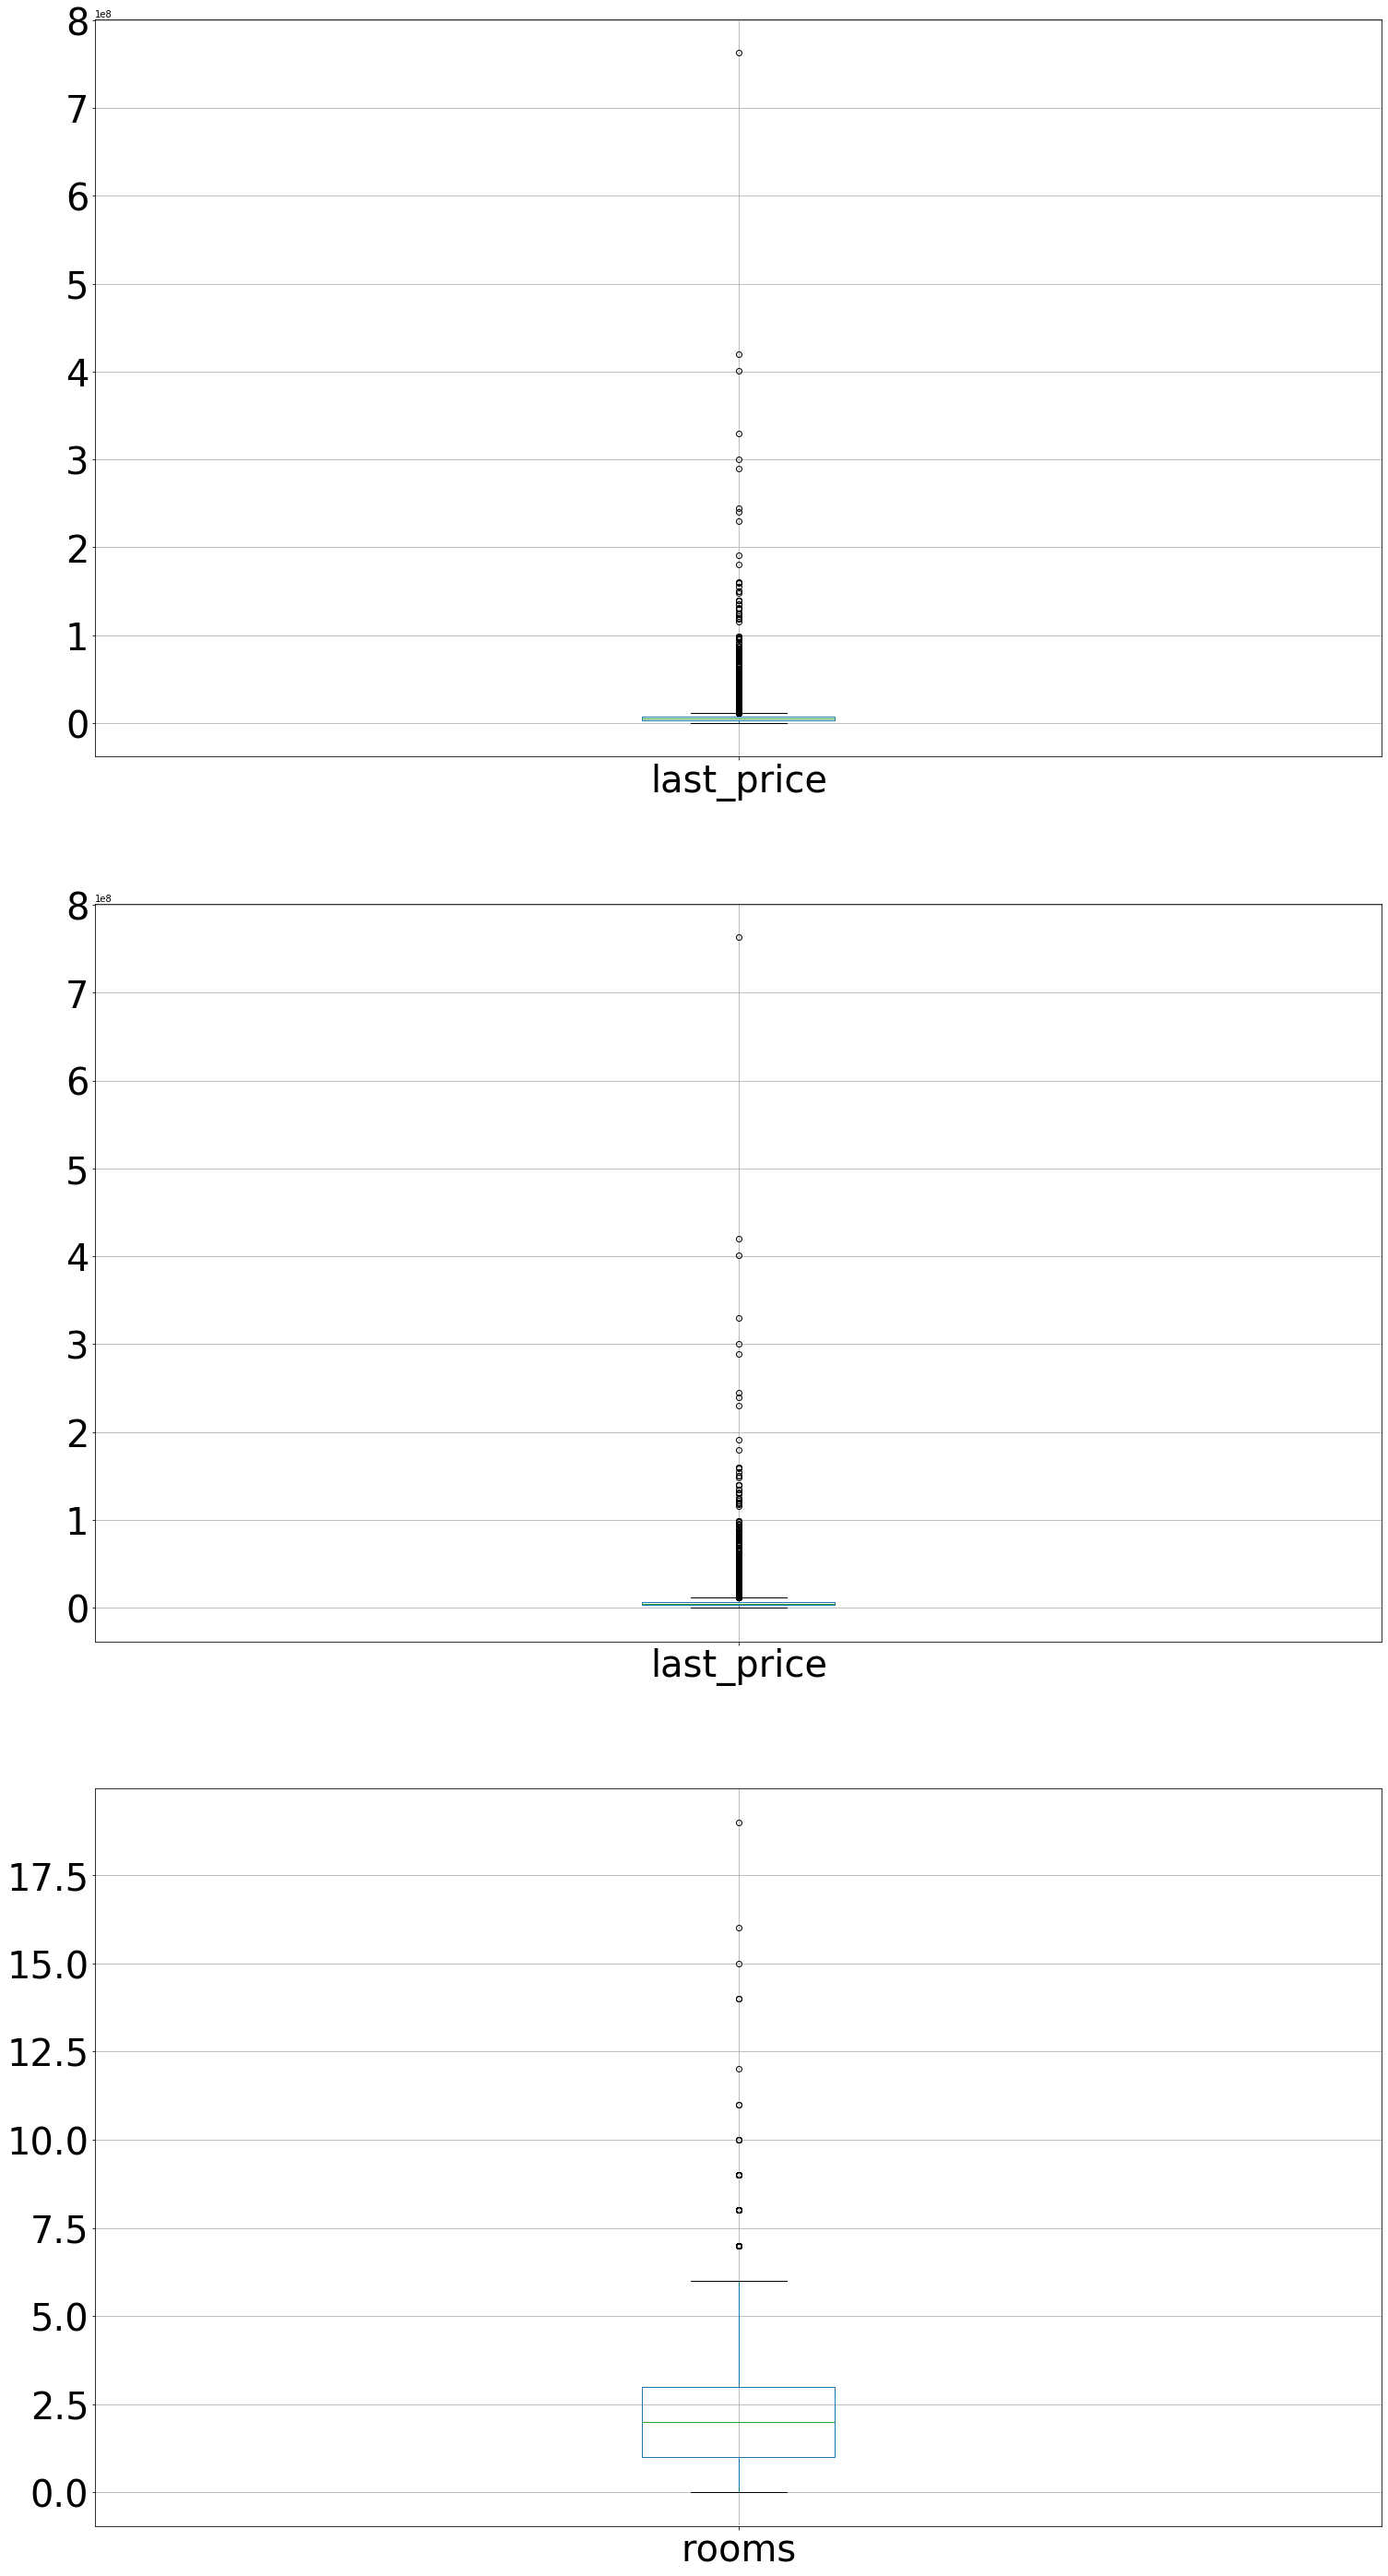

In [60]:
cols = 3
fig, axes = plt.subplots(cols, figsize=(25,50))
column_list = ['last_price', 'last_price', 'rooms', 'ceiling_height']
ylims = [770000000, 12500000, 20, 10]
count = 0

for c in range(cols):
    ax = df.boxplot(column=column_list[count], ax=axes[c], fontsize=40)
    count += 1

Из этих данных видно что есть вбросы:
* last_price - В основном преобладают от 2,5 до 7,5 млн. 400000000 и выше, до этих значений данные кажутся верными
* rooms - В основном преобладают 1-2х компнатные квартиры. После 10, до этих значений данные кажутся верными
* ceiling_height - 2,6-2,7 м самые распространенные значения. До 2,2 и после 5, в пределах этих значений данные кажутся верными

***Удалим все редкие значения***

Удалим total_area больше 550, выше этого значения данные кажутся не правдоподобными

In [61]:
df = df[df['total_area'] <= 550]
df.loc[(df['total_area'] > 550), 'total_area']

Series([], Name: total_area, dtype: float64)

Удалим living_area больее 300, выше этого значения данные кажутся не правдоподобными

In [62]:
df = df[df['living_area'] <= 300]

Удалим kitchen_area больее 100, выше этого значения данные кажутся не правдоподобными

In [63]:
df = df[df['kitchen_area'] <= 100]

In [64]:
area = df[['kitchen_area', 'living_area', 'total_area']]
area.query('kitchen_area > 100 or living_area > 300 or total_area > 550')

,kitchen_area,living_area,total_area


Удалим last_price более 400000000 и меньше 400000, данные, выходящие из этого диапазона, кажутся не правдоподобными

In [65]:
df = df[df['last_price'] <= 200000000]
df = df[df['last_price'] >= 400000]

Удалим rooms после 10, выше этого значения данные кажутся не правдоподобными

In [66]:
df = df[df['rooms'] <= 10]

Удалим ceiling_height до 2,2 и после 5, данные, выходящие из этого диапазона, кажутся не правдоподобными

In [67]:
df = df[df['ceiling_height'] <= 5]
df = df[df['ceiling_height'] >= 2.2]

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23632 entries, 0 to 23698
Data columns (total 29 columns):
total_images                  23632 non-null int64
last_price                    23632 non-null float64
total_area                    23632 non-null float64
first_day_exposition          23632 non-null datetime64[ns]
rooms                         23632 non-null int64
ceiling_height                23632 non-null float64
floors_total                  23632 non-null int64
living_area                   23632 non-null float64
floor                         23632 non-null int64
is_apartment                  23632 non-null bool
studio                        23632 non-null bool
open_plan                     23632 non-null bool
kitchen_area                  23632 non-null float64
balcony                       23632 non-null int64
locality_name                 23632 non-null object
airports_nearest              18259 non-null float64
cityCenters_nearest           18259 non-null float64
par

In [69]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_area,day,year,month,ratio_residential_to_total,ratio_kitchen_to_total
count,23632.000000,2.363200e+04,23632.000000,23632.000000,23632.000000,23632.000000,23632.000000,23632.000000,23632.000000,23632.000000,...,17625.000000,18259.000000,18152.000000,23632.000000,23632.000000,23632.000000,23632.00000,23632.000000,23632.000000,23632.000000
mean,9.858116,6.351938e+06,59.915033,2.063896,2.715427,10.676710,32.019127,5.892222,9.967132,0.591063,...,475.892255,0.770360,509.692348,156.570074,98990.087016,3.568847,2017.36696,6.401109,0.527310,0.178542
std,5.678698,7.569545e+06,33.026418,1.049483,0.211233,6.587818,22.147719,4.885791,6.543380,0.958758,...,235.367977,0.935893,200.093829,213.390830,45495.054065,1.788935,1.03948,3.491424,0.178383,0.092927
min,0.000000,4.300000e+05,12.000000,0.000000,2.200000,1.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,13.000000,0.000000,7962.960000,1.000000,2014.00000,1.000000,0.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.000000,2.000000,6.600000,0.000000,...,428.500000,0.000000,462.000000,22.000000,76619.095000,2.000000,2017.00000,3.000000,0.472222,0.125000
50%,9.000000,4.648500e+06,52.000000,2.000000,2.700000,9.000000,29.400000,4.000000,9.000000,0.000000,...,460.000000,1.000000,503.000000,74.000000,95000.000000,4.000000,2017.00000,6.000000,0.560000,0.166667
75%,14.000000,6.760848e+06,69.700000,3.000000,2.700000,16.000000,41.600000,8.000000,11.800000,1.000000,...,460.000000,1.000000,561.000000,198.250000,114193.757500,5.000000,2018.00000,10.000000,0.634615,0.230798
max,50.000000,1.908700e+08,500.000000,10.000000,5.000000,60.000000,300.000000,33.000000,93.200000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,995983.940000,7.000000,2019.00000,12.000000,1.000000,0.913043


Данные похожи на правду. Убрали максимально большие значения, которые не похожи на правду. Этих значений оказалось около 1% 

***Какие факторы больше всего влияют на стоимость квартиры?***

Зависит ли цена от площади, числа комнат, удалённости от центра и даты размещения: дня недели, месяца и года?

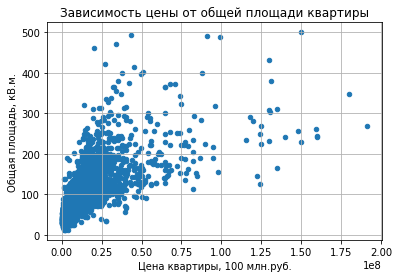

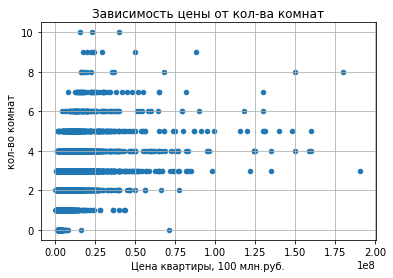

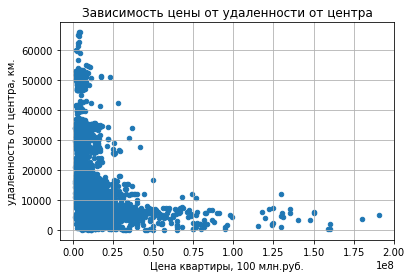

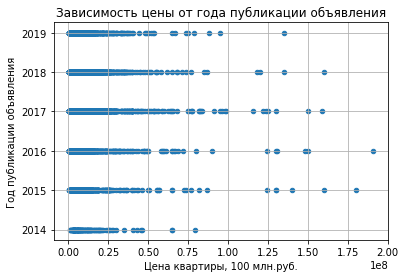

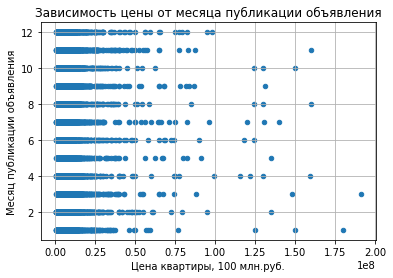

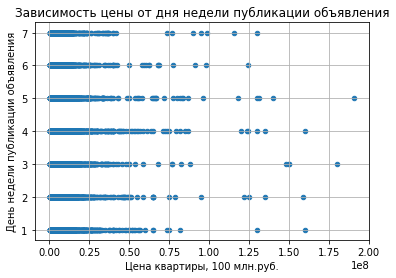

In [70]:
columns = ['total_area', 'rooms', 'cityCenters_nearest', 'year', 'month', 'day']
names = ['Зависимость цены от общей площади квартиры', 'Зависимость цены от кол-ва комнат', 
         'Зависимость цены от удаленности от центра', 'Зависимость цены от года публикации объявления', 
         'Зависимость цены от месяца публикации объявления','Зависимость цены от дня недели публикации объявления']
y_names = ['Общая площадь, кВ.м.', 'кол-во комнат', 'удаленность от центра, км.', 'Год публикации объявления', 
           'Месяц публикации объявления','День недели публикации объявления']
for i, y in enumerate(columns):
    df.plot(x='last_price', y=y, title = names[i], kind='scatter', grid=True)
    plt.xlabel('Цена квартиры, 100 млн.руб.')
    plt.ylabel(y_names[i])
    plt.show()

Посмотирм зависимость медианных значений от цены

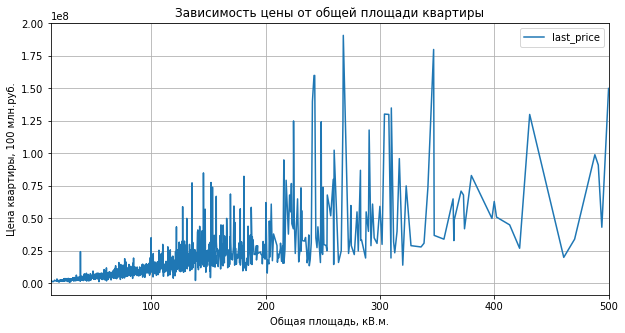

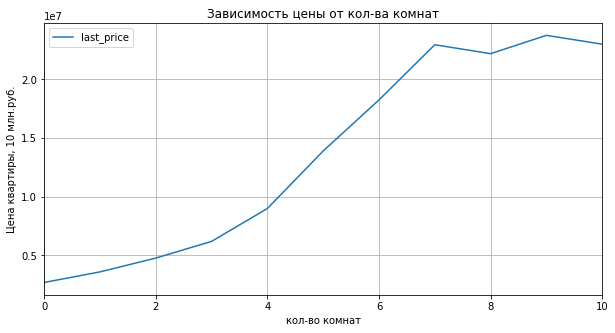

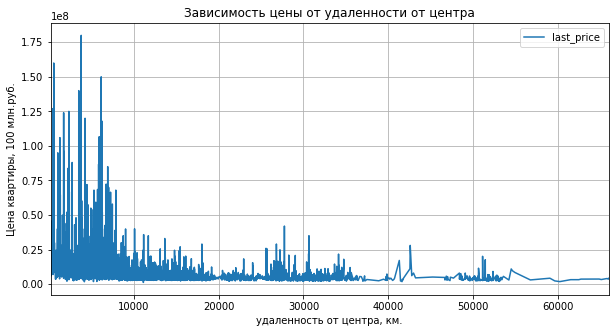

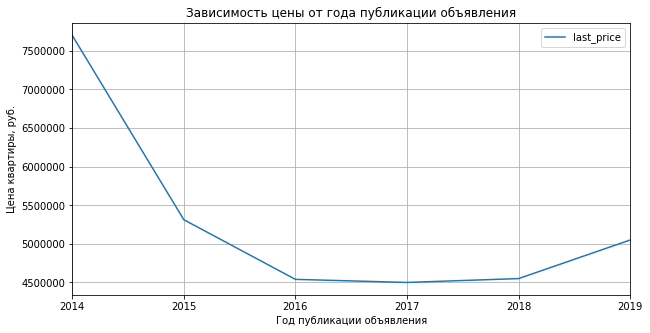

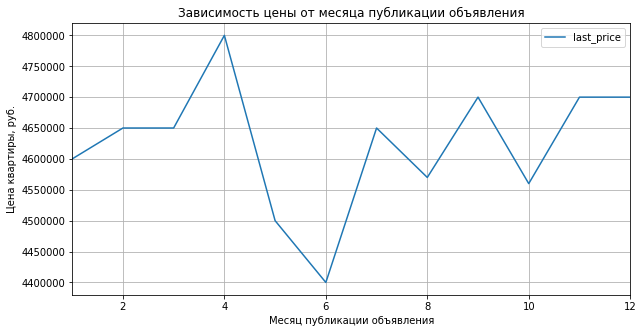

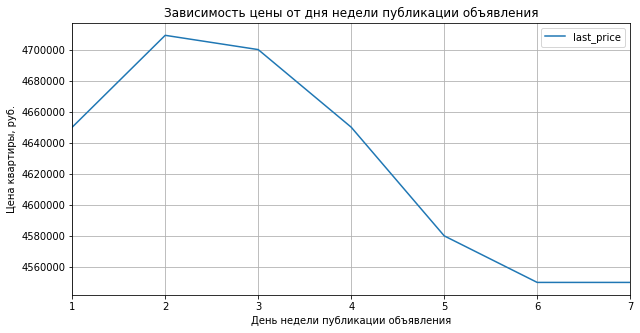

In [71]:
for i, y in enumerate(columns):
    if columns[i] == 'total_area':
        (df.pivot_table(index=[columns[i]], values='last_price', aggfunc='median')
         .plot(title = names[i], grid=True, figsize=(10, 5))
         )
        plt.ylabel('Цена квартиры, 100 млн.руб.')
        plt.xlabel(y_names[i])
        plt.show()
    elif columns[i] == 'rooms':
        (df.pivot_table(index=[columns[i]], values='last_price', aggfunc='median')
         .plot(title = names[i], grid=True, figsize=(10, 5))
         )
        plt.ylabel('Цена квартиры, 10 млн.руб.')
        plt.xlabel(y_names[i])
        plt.show()
    elif columns[i] == 'cityCenters_nearest':
        (df.pivot_table(index=[columns[i]], values='last_price', aggfunc='median')
         .plot(title = names[i], grid=True, figsize=(10, 5))
         )
        plt.ylabel('Цена квартиры, 100 млн.руб.')
        plt.xlabel(y_names[i])
        plt.show()      
    else:
        (df.pivot_table(index=[columns[i]], values='last_price', aggfunc='median')
         .plot(title = names[i], grid=True, figsize=(10, 5))
         )
        plt.ylabel('Цена квартиры, руб.')
        plt.xlabel(y_names[i])
        plt.show()

Посмотирм зависимость средних значений от цены

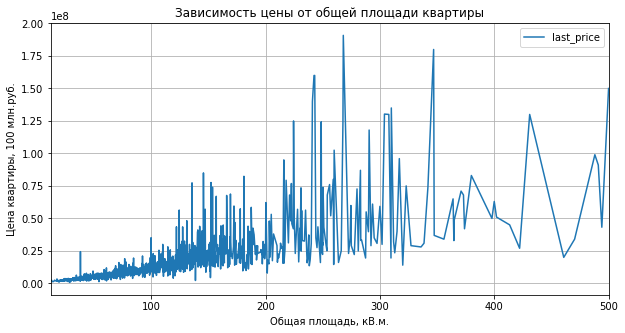

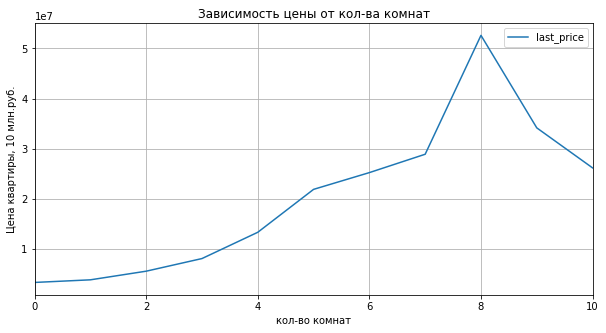

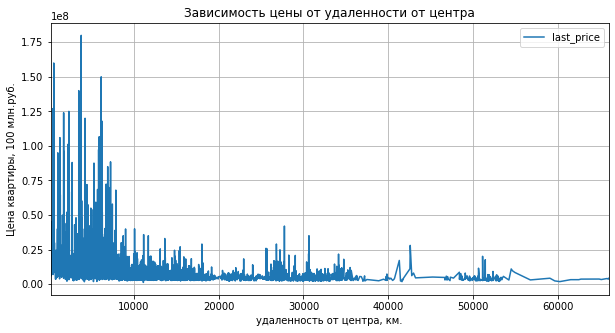

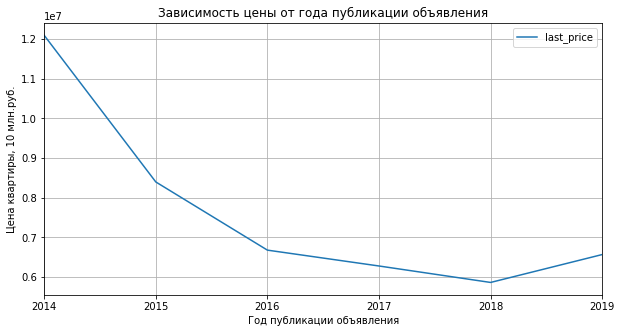

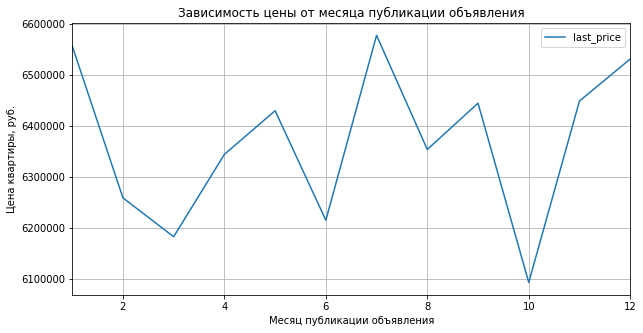

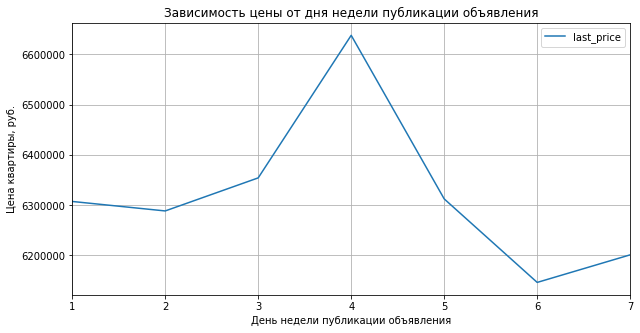

In [72]:
for i, y in enumerate(columns):
    if columns[i] == 'rooms':
        (df.pivot_table(index=[columns[i]], values='last_price', aggfunc='mean')
         .plot(title = names[i], grid=True, figsize=(10, 5))
         )
        plt.ylabel('Цена квартиры, 10 млн.руб.')
        plt.xlabel(y_names[i])
        plt.show()
    elif columns[i] == 'year':
        (df.pivot_table(index=[columns[i]], values='last_price', aggfunc='mean')
         .plot(title = names[i], grid=True, figsize=(10, 5))
         )
        plt.ylabel('Цена квартиры, 10 млн.руб.')
        plt.xlabel(y_names[i])
        plt.show()
    elif columns[i] == 'month':
        (df.pivot_table(index=[columns[i]], values='last_price', aggfunc='mean')
         .plot(title = names[i], grid=True, figsize=(10, 5))
         )
        plt.ylabel('Цена квартиры, руб.')
        plt.xlabel(y_names[i])
        plt.show()
    elif columns[i] == 'day':
        (df.pivot_table(index=[columns[i]], values='last_price', aggfunc='mean')
         .plot(title = names[i], grid=True, figsize=(10, 5))
         )
        plt.ylabel('Цена квартиры, руб.')
        plt.xlabel(y_names[i])
        plt.show()        
    else:
        (df.pivot_table(index=[columns[i]], values='last_price', aggfunc='mean')
         .plot(title = names[i], grid=True, figsize=(10, 5))
         )
        plt.ylabel('Цена квартиры, 100 млн.руб.')
        plt.xlabel(y_names[i])
        plt.show()

Из диаграмм видно что:

* Безусловно цена ростет с увеличением общей площади квартиры, но встречаются варианты где квартира в 500 кв.м. стоит как 50 млн., так и 150 млн. Разброс в цене, скорее всего зависит от локации квартиры.
* С комнатами не все так однозначно. Цена ростет с увеличением комнат до 5. Потом начинает снижаться, тоже скорее всего из-за локации.
* А вот с удаленностью от центра Санкт-Петербурга все предельно понятно. Чем ближе квартиры к центру, тем больше стоят.
* В четверг размещались самые дорогие квартиры.
* В 2014 году Квартиры стоили, в среднем дороже, чем в остальные года.

Зависит ли цена от того, на каком этаже расположена квартира: первом, последнем или другом?

Построим графики по среднему и медианному значениям цены для 3х групп этажей

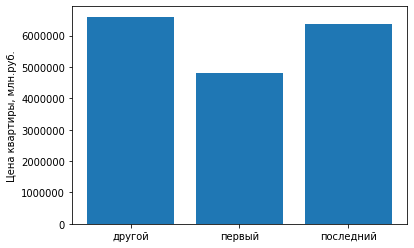

In [73]:
dmy = df.groupby('floor_apart')['last_price'].mean()
plt.bar(dmy.index, dmy.values)
plt.ylabel('Цена квартиры, млн.руб.')
plt.show()

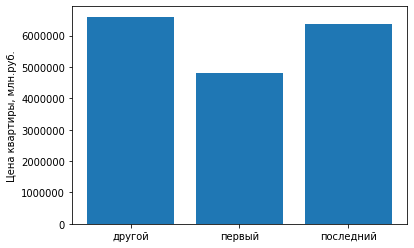

In [74]:
dmy1 = df.groupby('floor_apart')['last_price'].median()
plt.bar(dmy1.index, dmy.values)
plt.ylabel('Цена квартиры, млн.руб.')
plt.show()


Саый дешёвый этаж - первый.

***10 населённых пунктов с наибольшим числом объявлений.***

Cредняя цена квадратного метра в этих населённых пунктах, а так же с самой высокой и низкой стоимостью жилья.

In [75]:
(df.pivot_table(index='locality_name', values='last_price', aggfunc=('count', 'mean', 'max','min'))
 .sort_values('count', ascending = False).head(10)
)

,count,max,mean,min
locality_name,,,,
Санкт-Петербург,15696,190870000.0,7.778409e+06,1190000.0
посёлок Мурино,522,8500000.0,3.672049e+06,1730000.0
посёлок Шушары,440,10990000.0,4.108082e+06,1500000.0
Всеволожск,397,24412900.0,3.792819e+06,965780.0
Пушкин,369,42000000.0,6.469036e+06,1990000.0
Колпино,338,36900000.0,3.964021e+06,2100000.0
посёлок Парголово,327,9140000.0,4.488075e+06,1400000.0
Гатчина,306,13900000.0,3.487972e+06,850000.0
деревня Кудрово,299,13000000.0,4.234158e+06,1800000.0


Санкт-Петербург лидирует. В этом городе самая большая цена за квартиру. Выборг же на против в аутсайдерах.

***Изучение предложения квартир: какая область входит в центр?***

Создадим DF со значениями - только Санкт-Петербург

In [76]:
df_spb = df[df['locality_name'] == 'Санкт-Петербург']
df_spb = df_spb[['locality_name', 'last_price', 'cityCenters_nearest']]
df_spb

,locality_name,last_price,cityCenters_nearest
0,Санкт-Петербург,13000000.0,16028.0
2,Санкт-Петербург,5196000.0,13933.0
3,Санкт-Петербург,64900000.0,6800.0
4,Санкт-Петербург,10000000.0,8098.0
7,Санкт-Петербург,7915000.0,11634.0
...,...,...,...
23689,Санкт-Петербург,3550000.0,16081.0
23690,Санкт-Петербург,5500000.0,6263.0
23691,Санкт-Петербург,9470000.0,4489.0
23694,Санкт-Петербург,9700000.0,4232.0


Переведем метры в километры и округлим

In [77]:
df_spb['cityCenters_nearest'] = (df_spb['cityCenters_nearest'] / 1000).round().astype(int)


Сделаем график на основе сводной таблицы (удаленность от центра, средняя цена квартры).

Text(0, 0.5, 'Средняя цена квартиры, 10 млн.руб.')

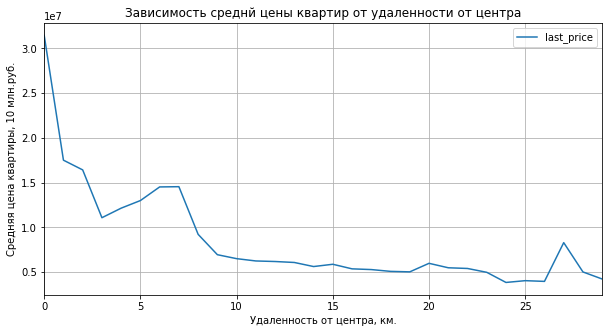

In [78]:
(df_spb.pivot_table(index=['cityCenters_nearest'], values='last_price', aggfunc='mean')
 .plot(title = 'Зависимость среднй цены квартир от удаленности от центра', grid=True, figsize=(10, 5))
)
plt.xlabel('Удаленность от центра, км.')
plt.ylabel('Средняя цена квартиры, 10 млн.руб.')

Из графика видно что центр заканчивается после 3х километров.

<div class="alert alert-block alert-success">
<b>Success:</b> Мне кажется, что по графику видна граница в 6 км, но ладно</div>

***Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?***

Создадим таблицу, где будут только квартиры в Санкт-Петербурге, не дальше 3500 м от центра. (3500 м, потому что в предыдущем задании мы округляли км).

In [79]:
df_spb_center = df[df['locality_name'] == 'Санкт-Петербург']
df_spb_center = df_spb_center[df_spb_center['cityCenters_nearest'] < 3500]
df_spb_center

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_area,day,year,month,floor_apart,ratio_residential_to_total,ratio_kitchen_to_total
24,8,6500000.0,97.2,2015-10-31,2,2.70,3,46.5,1,False,...,3.0,124.0,265,66872.43,6,2015,10,первый,0.478395,0.201646
99,32,9600000.0,90.0,2017-09-26,4,2.70,5,67.0,2,False,...,0.0,503.0,104,106666.67,2,2017,9,другой,0.744444,0.088889
138,8,4800000.0,40.0,2017-11-18,2,2.70,3,29.0,2,False,...,2.0,729.0,80,120000.00,6,2017,11,другой,0.725000,0.150000
154,1,8200000.0,80.0,2018-11-06,3,4.15,3,44.2,2,False,...,1.0,838.0,38,102500.00,2,2018,11,другой,0.552500,0.152500
155,8,96000000.0,317.0,2017-07-07,4,3.50,3,183.0,3,False,...,3.0,366.0,62,302839.12,5,2017,7,последний,0.577287,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23430,18,5260000.0,38.0,2018-11-06,1,3.30,5,16.0,1,False,...,1.0,466.0,12,138421.05,2,2018,11,первый,0.421053,0.315789
23449,4,6300000.0,52.6,2015-05-28,3,3.25,5,29.8,2,False,...,3.0,69.0,505,119771.86,4,2015,5,другой,0.566540,0.165399
23555,5,15350000.0,158.5,2019-03-07,7,2.95,7,57.4,7,False,...,0.0,503.0,0,96845.43,4,2019,3,последний,0.362145,0.078233
23602,0,8700000.0,73.0,2019-01-23,3,2.65,4,0.0,4,False,...,3.0,151.0,34,119178.08,3,2019,1,последний,0.000000,0.000000


In [80]:
df_spb_center.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_area,day,year,month,ratio_residential_to_total,ratio_kitchen_to_total
count,873.000000,8.730000e+02,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,...,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000
mean,10.520046,1.497416e+07,96.577686,3.073310,3.054215,4.995418,56.796449,3.132875,14.432348,0.113402,...,424.175258,1.922108,374.782360,205.276060,145722.872199,3.588774,2017.137457,6.437572,0.576680,0.162073
std,6.322189,1.800071e+07,51.409715,1.376952,0.385929,1.222862,37.586426,1.484085,10.309080,0.406051,...,183.449729,1.074466,252.326679,266.995229,98751.799948,1.725872,1.157101,3.551529,0.172910,0.096559
min,0.000000,2.100000e+06,12.000000,0.000000,2.500000,2.000000,0.000000,1.000000,0.000000,0.000000,...,18.000000,0.000000,22.000000,0.000000,28919.630000,1.000000,2014.000000,1.000000,0.000000,0.000000
25%,6.000000,7.297000e+06,63.000000,2.000000,2.700000,4.000000,33.700000,2.000000,8.600000,0.000000,...,304.000000,1.000000,152.000000,19.000000,96491.230000,2.000000,2017.000000,3.000000,0.531915,0.107317
50%,10.000000,9.700000e+06,84.300000,3.000000,3.000000,5.000000,49.000000,3.000000,11.500000,0.000000,...,460.000000,2.000000,340.000000,94.000000,117283.950000,4.000000,2017.000000,7.000000,0.610833,0.139860
75%,15.000000,1.480000e+07,115.000000,4.000000,3.300000,6.000000,70.500000,4.000000,18.000000,0.000000,...,508.000000,3.000000,523.000000,283.000000,151308.900000,5.000000,2018.000000,10.000000,0.681670,0.195349
max,50.000000,1.600000e+08,400.000000,9.000000,4.900000,12.000000,255.700000,10.000000,90.000000,4.000000,...,1079.000000,3.000000,1077.000000,1572.000000,995983.940000,7.000000,2019.000000,12.000000,0.935135,0.674419


***Предварительный анализ дал следующее:***

* по площади есть как квартира 12 кв.м., так и 400 кв.м. Но среднее значение выглядит адэкватным (схоже с остальными районами)
* по цене за квартиру - цены находятся в промежутке от 2,1 млн до 160 млн (схоже с остальными районами)
* число комнат - от 0 (студия) до 9 (схоже с остальными районами)
* высота потолков - от 2,5 до 4,9 метров (схоже с остальными районами)

Изучение параметров: площадь, цена, число комнат, высота потолков

Построим гистограммы

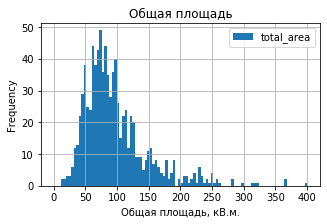

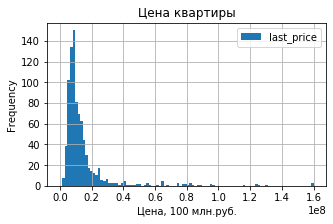

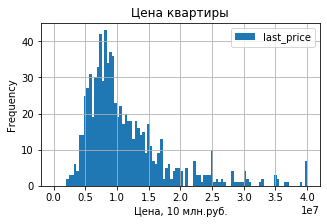

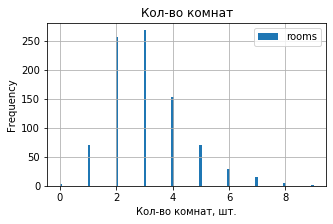

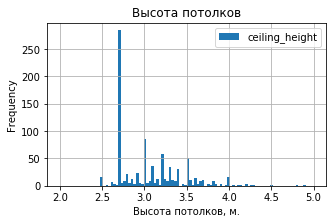

In [81]:
columns = ['total_area', 'last_price', 'last_price', 'rooms', 'ceiling_height']
ranges = [(0,400), (0,160000000), (0,40000000), (0,9), (2,5)]
names = ['Общая площадь', 'Цена квартиры', 'Цена квартиры', 'Кол-во комнат', 'Высота потолков']
names_x = ['Общая площадь, кВ.м.', 'Цена, 100 млн.руб.', 'Цена, 10 млн.руб.', 'Кол-во комнат, шт.', 'Высота потолков, м.']

for i in range(len(columns)):
    df_spb_center.plot(y = columns[i], title = names[i], kind = 'hist', bins = 100, grid = True, figsize = (5,3), 
                       range = ranges[i])
    plt.xlabel(names_x[i])
    df_spb_center[columns[i]].describe()

Наибольшее кол-во квартир в центре Санкт-Петербурга с площадъю от 50 до 100 кв.м., что от части совпадает со всей областью (от 30 до 60 кв.м.)
Цена за квартиры в центре Санкт-Петербурга в среднем выше (5-10 млн) чем по области в целом (2,5-5 млн)
Самое распространненое кол-во комнат в Санкт-Петербурге 2-3 комнаты, что от части совпадает со всей областью 1-2х комнатные квартиры (реже 3х)
Как и везде 2.7м - самая распространненая высота потолков

***Какие факторы больше всего влияют на стоимость квартиры?***

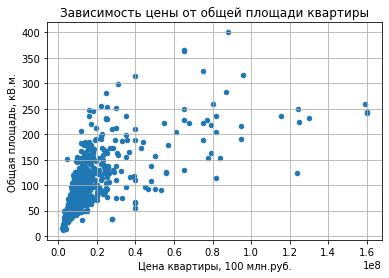

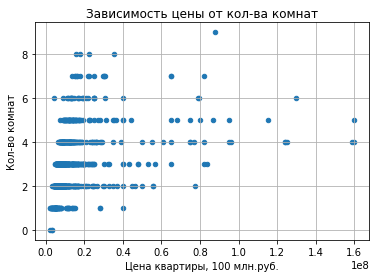

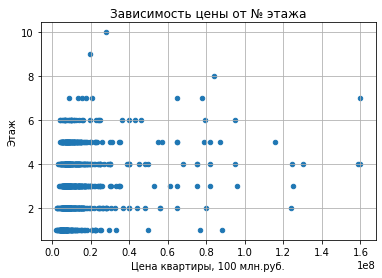

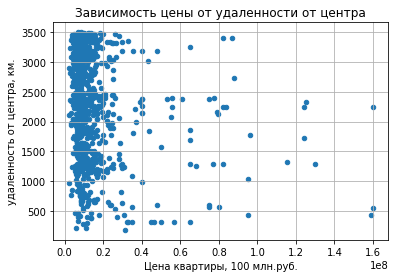

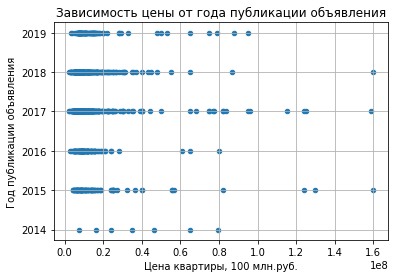

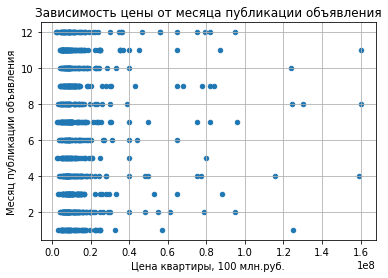

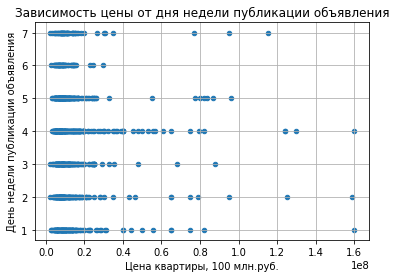

In [82]:
columns = ['total_area', 'rooms', 'floor', 'cityCenters_nearest', 'year', 'month', 'day']
names = ['Зависимость цены от общей площади квартиры', 'Зависимость цены от кол-ва комнат', 
         'Зависимость цены от № этажа', 'Зависимость цены от удаленности от центра', 
         'Зависимость цены от года публикации объявления', 'Зависимость цены от месяца публикации объявления',
         'Зависимость цены от дня недели публикации объявления']
y_names = ['Общая площадь, кВ.м.', 'Кол-во комнат', 'Этаж', 'удаленность от центра, км.', 'Год публикации объявления', 
           'Месяц публикации объявления','День недели публикации объявления']
for i, y in enumerate(columns):
    df_spb_center.plot(x='last_price', y=y, title = names[i], kind='scatter', grid = True)
    plt.xlabel('Цена квартиры, 100 млн.руб.')
    plt.ylabel(y_names[i])
    plt.show()

Посмотирм зависимость медианных значений от цены

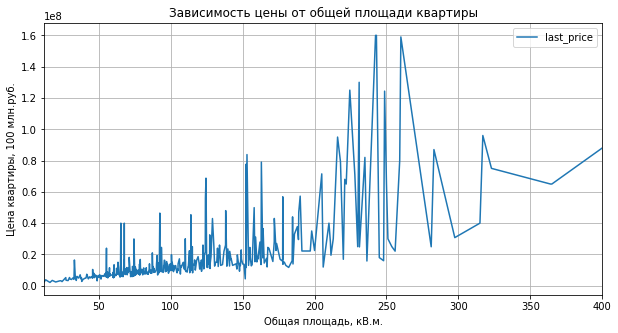

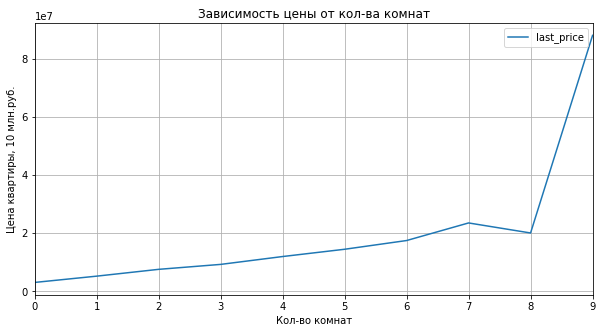

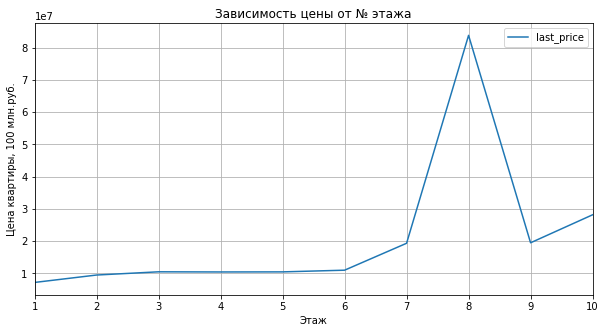

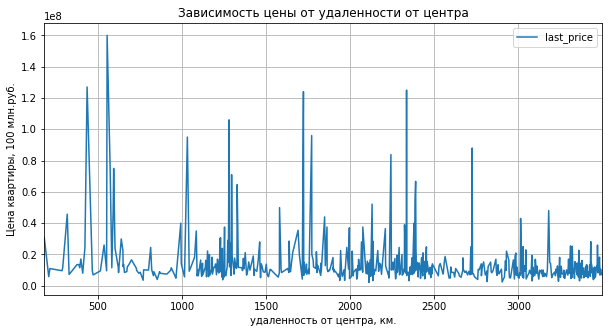

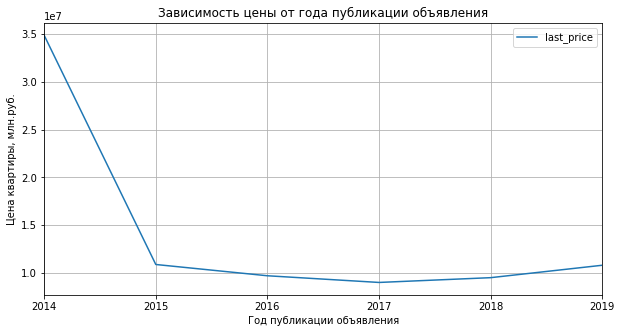

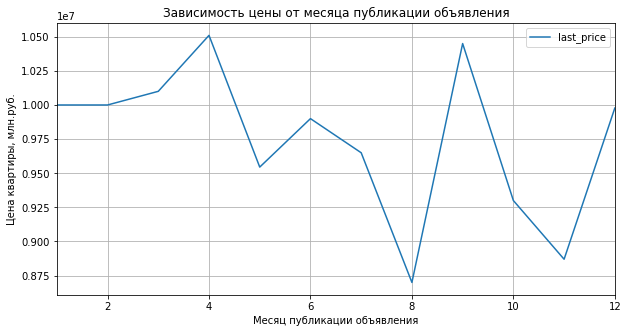

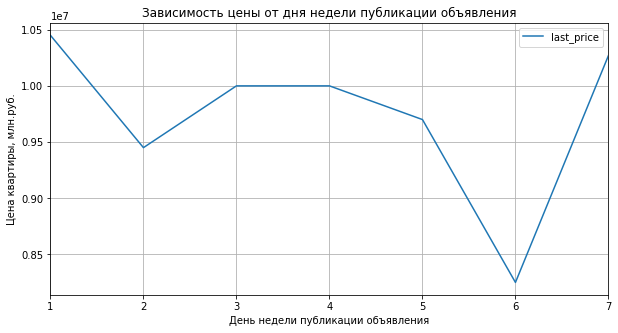

In [83]:
for i, y in enumerate(columns):
    if columns[i] == 'rooms':
        (df_spb_center.pivot_table(index=[columns[i]], values='last_price', aggfunc='median')
         .plot(title = names[i], grid=True, figsize=(10, 5))
         )
        plt.ylabel('Цена квартиры, 10 млн.руб.')
        plt.xlabel(y_names[i])
        plt.show()
    elif columns[i] == 'year':
        (df_spb_center.pivot_table(index=[columns[i]], values='last_price', aggfunc='median')
         .plot(title = names[i], grid=True, figsize=(10, 5))
         )
        plt.ylabel('Цена квартиры, млн.руб.')
        plt.xlabel(y_names[i])
        plt.show()
    elif columns[i] == 'month':
        (df_spb_center.pivot_table(index=[columns[i]], values='last_price', aggfunc='median')
         .plot(title = names[i], grid=True, figsize=(10, 5))
         )
        plt.ylabel('Цена квартиры, млн.руб.')
        plt.xlabel(y_names[i])
        plt.show()
    elif columns[i] == 'day':
        (df_spb_center.pivot_table(index=[columns[i]], values='last_price', aggfunc='median')
         .plot(title = names[i], grid=True, figsize=(10, 5))
         )
        plt.ylabel('Цена квартиры, млн.руб.')
        plt.xlabel(y_names[i])
        plt.show()        
    else:
        (df_spb_center.pivot_table(index=[columns[i]], values='last_price', aggfunc='median')
         .plot(title = names[i], grid=True, figsize=(10, 5))
         )
        plt.ylabel('Цена квартиры, 100 млн.руб.')
        plt.xlabel(y_names[i])
        plt.show()

Посмотирм зависимость средних значений от цены

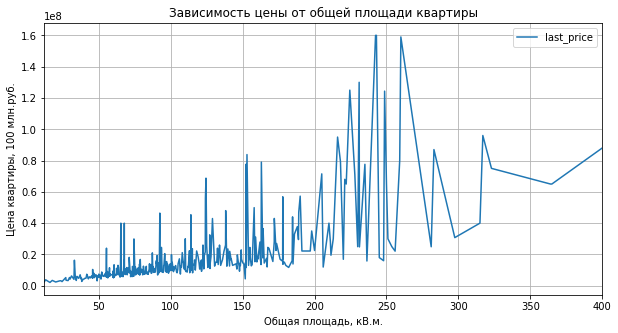

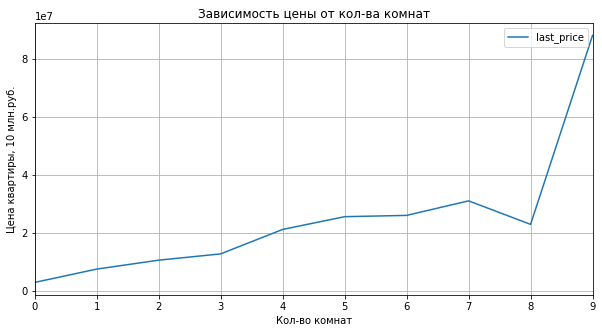

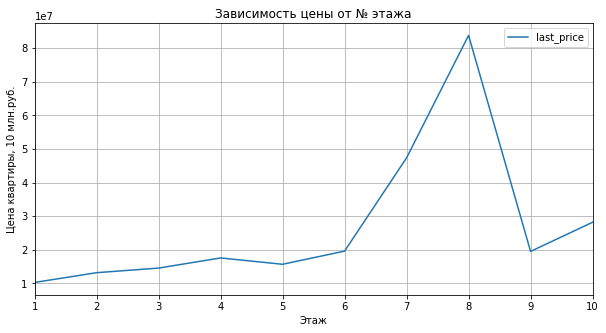

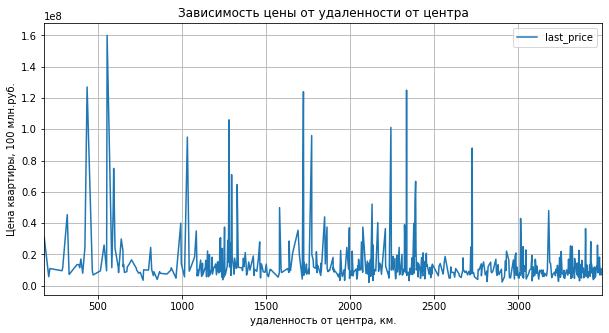

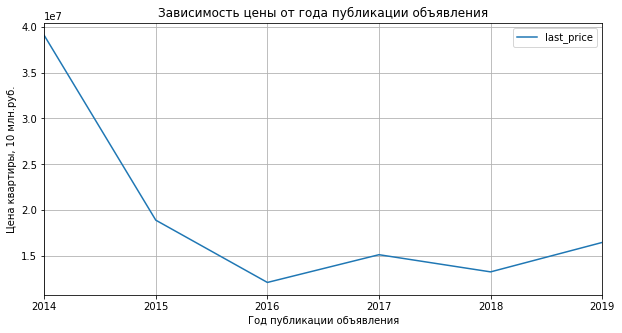

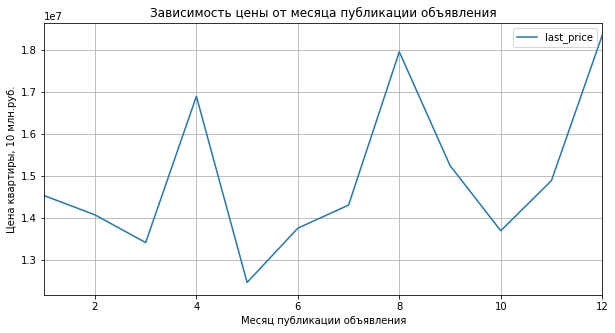

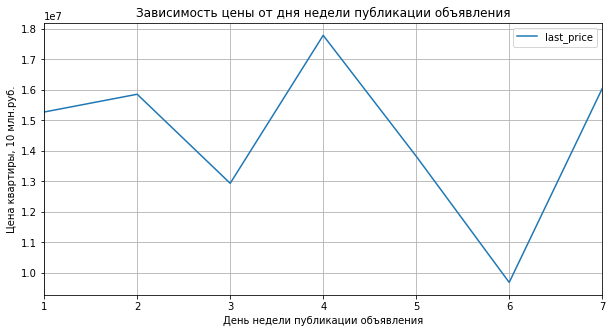

In [84]:
for i, y in enumerate(columns):
    if columns[i] == 'total_area':
        (df_spb_center.pivot_table(index=[columns[i]], values='last_price', aggfunc='mean')
         .plot(title = names[i], grid=True, figsize=(10, 5))
         )
        plt.ylabel('Цена квартиры, 100 млн.руб.')
        plt.xlabel(y_names[i])
        plt.show()
    elif columns[i] == 'cityCenters_nearest':
        (df_spb_center.pivot_table(index=[columns[i]], values='last_price', aggfunc='mean')
         .plot(title = names[i], grid=True, figsize=(10, 5))
         )
        plt.ylabel('Цена квартиры, 100 млн.руб.')
        plt.xlabel(y_names[i])
        plt.show()    
    else:
        (df_spb_center.pivot_table(index=[columns[i]], values='last_price', aggfunc='mean')
         .plot(title = names[i], grid=True, figsize=(10, 5))
         )
        plt.ylabel('Цена квартиры, 10 млн.руб.')
        plt.xlabel(y_names[i])
        plt.show()

Из диаграмм видно что:
* Безусловно цена ростет с увеличением общей площади квартиры, но встречаются варианты где квартира в 500 кв.м. стоит как 50 млн., так и 150 млн. Разброс в цене, скорее всего зависит от локации квартиры.
* Цена квартиры ростет с увеличением комнат. Но есто 4-5 комнатные квартиры за максимальную стоимость 160 млн.
* В пределах 3500м от центра основная масса квартир стоит от 7 до 15 млн.
* Квартиры, размещенные к продаже в будние дни, в среднем дороже, чем размещенные в выходные.
* В 2014 году размещено меньше обьявлений о продаже квартир чем в последующие года. Но они были самыми дорогими.
* В апреле, августе и декабре размещены самые дорогие квартиры
* по субботам размещают объявления по продаже дешёвых квартир

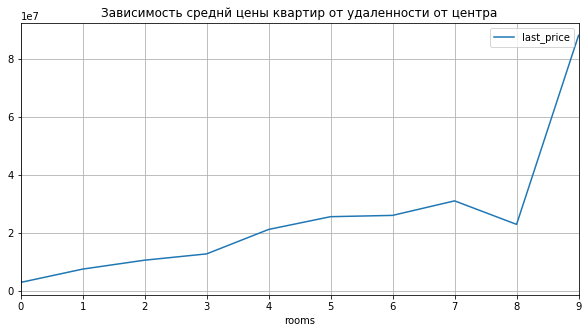

In [85]:
(df_spb_center.pivot_table(index=['rooms'], values='last_price', aggfunc='mean')
 .plot(title = 'Зависимость среднй цены квартир от удаленности от центра', grid=True, figsize=(10, 5))
)

### Шаг 5. Общий вывод

***Факторы, которые сильнее всего влияют на конечную цену:***
Выводы получились интуитивно предсказуемые.
* ***Метраж - Чем больше площадь квартиры, тем выше цена.*** Кончно не без исключений. Например в Лен. области наблюдаются квартиры, которые стоят от 175 до 200 мл.н руб., с метражом в пределах 300 кВ.м. (это самые дорогие квартиры). Вместе с этим есть и квартиры с метражом в 500 кВ.м. и стоимостью 25, 50, 100 млн. руб. В Центре Санкт-Петербурга наблюдаются квартиры, которые стоят 160 мл.н руб., с метражом около 250 кВ.м. (это самые дорогие квартиры). Вместе с этим есть и квартиры с метражом в 400 кВ.м. и стоимостью 90 млн. руб. Но общая тенденция - чем больше метраж квартиры, тем выше цена.
* ***Комнаты - Чем больше комнат, тем выше цена.*** При чем в Лен. области самая дорогая квартира (190 млр. руб.) - 3х комнатная. А 10ти комнатные квартиры могут стоить 40 млн.руб. В центре Санкт-Петербурга, самые дорогие квартиры 4-5ти комнатные (160млн. руб). В 8им комнатные квартиры стоят 20-40 млн. руб.
* ***Удаленность от центра (по области) - В центре Санкт-Петербурга самые дорогие квартиры. Чем дальше квартира от центра тем она дешевле***
* ***Этажи - На первом этаже самые дешёвые квартиры.*** На последнем этаже квартиры стоят незначительно меньше чем на остальных
* ***Год размещения объявления*** В 2014 году, в среднем, были самые дорогие квартиры. Падение продолжалось до 2016-2017 годов. Потом заметна тенденция к росту.
* ***Месяц размещения объявления*** По области заметно снижение цены на квартиры в июне, августе и октябре. В центре Санкт-Петербурга снижение цен происходит в мае, августе и ноябре
* ***День размещения объявления*** - По области квартиры, размещенные к продаже в выходные, в среднем дешевле, чем размещенные в будние дни. в Санкт-Петербурге квартиры, размещенные к продаже в субботу, в среднем дешевле, чем размещенные в остальные дни.

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод